# Sample of Teaching Material

---

I come up with solutions to weekly Python lab assignments for a graduate level introductory data analysis class at the University of San Francisco. The class is composed of college seniors, MBA students, as well as Biotech Masters students who have little or no experience in Python programming. **This is an excerpt from one of my solutions**.

---

<h5> <u> Questions on Dictionaries </u> </h5>

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        In words, explain what a dictionary is in Python.
    </span>
</div>

1. A dictionary is a collection of **key-value pairs**. 


> A key-value pair is a pair of <u>linked</u> data objects, where one object (the key) <u>points to</u>, or provides access to, the other object (the value).
>
> $$
\text{data object (key)} \rightarrow \text{data object (value)}
$$
>
> To understand this better, let's say we have a Python dictionary `example_dict = {"Is John married?": "No"}` and a Python list `example_list = ["Is John married?", "No"]`.
>
> To know whether John is married, we can simply run `example_dict["Is John married?"]`. This works because the key string `"Is John married?"` points to the value string `"No"` in the dictionary. 
>
> In the list, however, the same string `"Is John married?"` is <u>not</u> linked to the string `"No"`.

2. Dictionaries are <u>mutable</u>. Existing key-value pairs can be removed or modified, and new key-value pairs can be added. 


3. A dictionary <u>in Python</u> is just a specific implementation of a dictionary. (No surprises here.) You can define a dictionary in Python by enclosing a comma-separated collection of key-value pairs in curly braces (`{}`). A colon (`:`) separates each key from its associated value.

```
python_dict = {
     <key>: <value>,
     <key>: <value>,
          .
          .
          .
     <key>: <value>
}
```

**Note:** While Python dictionaries "are unordered in Python versions up to and including Python 3.6" it turns out that "since Python 3.7, dictionaries are order-preserving"! (See [here](https://stackoverflow.com/questions/4326658/how-to-index-into-a-dictionary) for more information.) Nonetheless, a dictionary in the general sense should still be regarded as being unordered. 

---

*A deeper look*

---

1. A dictionary <u>in Python</u> (a high-level programming language) is *fundamentally* just a **hash table** implemented in C (a low-level programming language). 

> See [here](https://stackoverflow.com/questions/327311/how-are-pythons-built-in-dictionaries-implemented) for more information, and [here](https://github.com/python/cpython/blob/main/Objects/dictobject.c) for the details of the implementation.

2. A hash table is a data structure that is, perhaps, best conceived as an <u>array of buckets</u>\*. It can be used to implement dictionaries (see [here](https://stackoverflow.com/questions/2061222/what-is-the-true-difference-between-a-dictionary-and-a-hash-table)), such as those in Python. 

> \* See illustration below. A bucket is basically a "container" that can be filled with data objects (e.g., dictionary values). Thinking of a hash table as an <u>array</u> of buckets is actually apt, since every element in the array is of the same type ("bucket") and each bucket has an associated index!

> Why is a hash table called a "hash table"? Because, in some sense, it *is* a table consisting of a column of buckets and an index column where the indices are **hashes** ("low-level" numbers that can be "understood" directly by a computer). 

> Python dictionaries cannot be implemented directly at the "low level", because the keys cannot be "understood" directly by a computer and need to be converted to hashes.

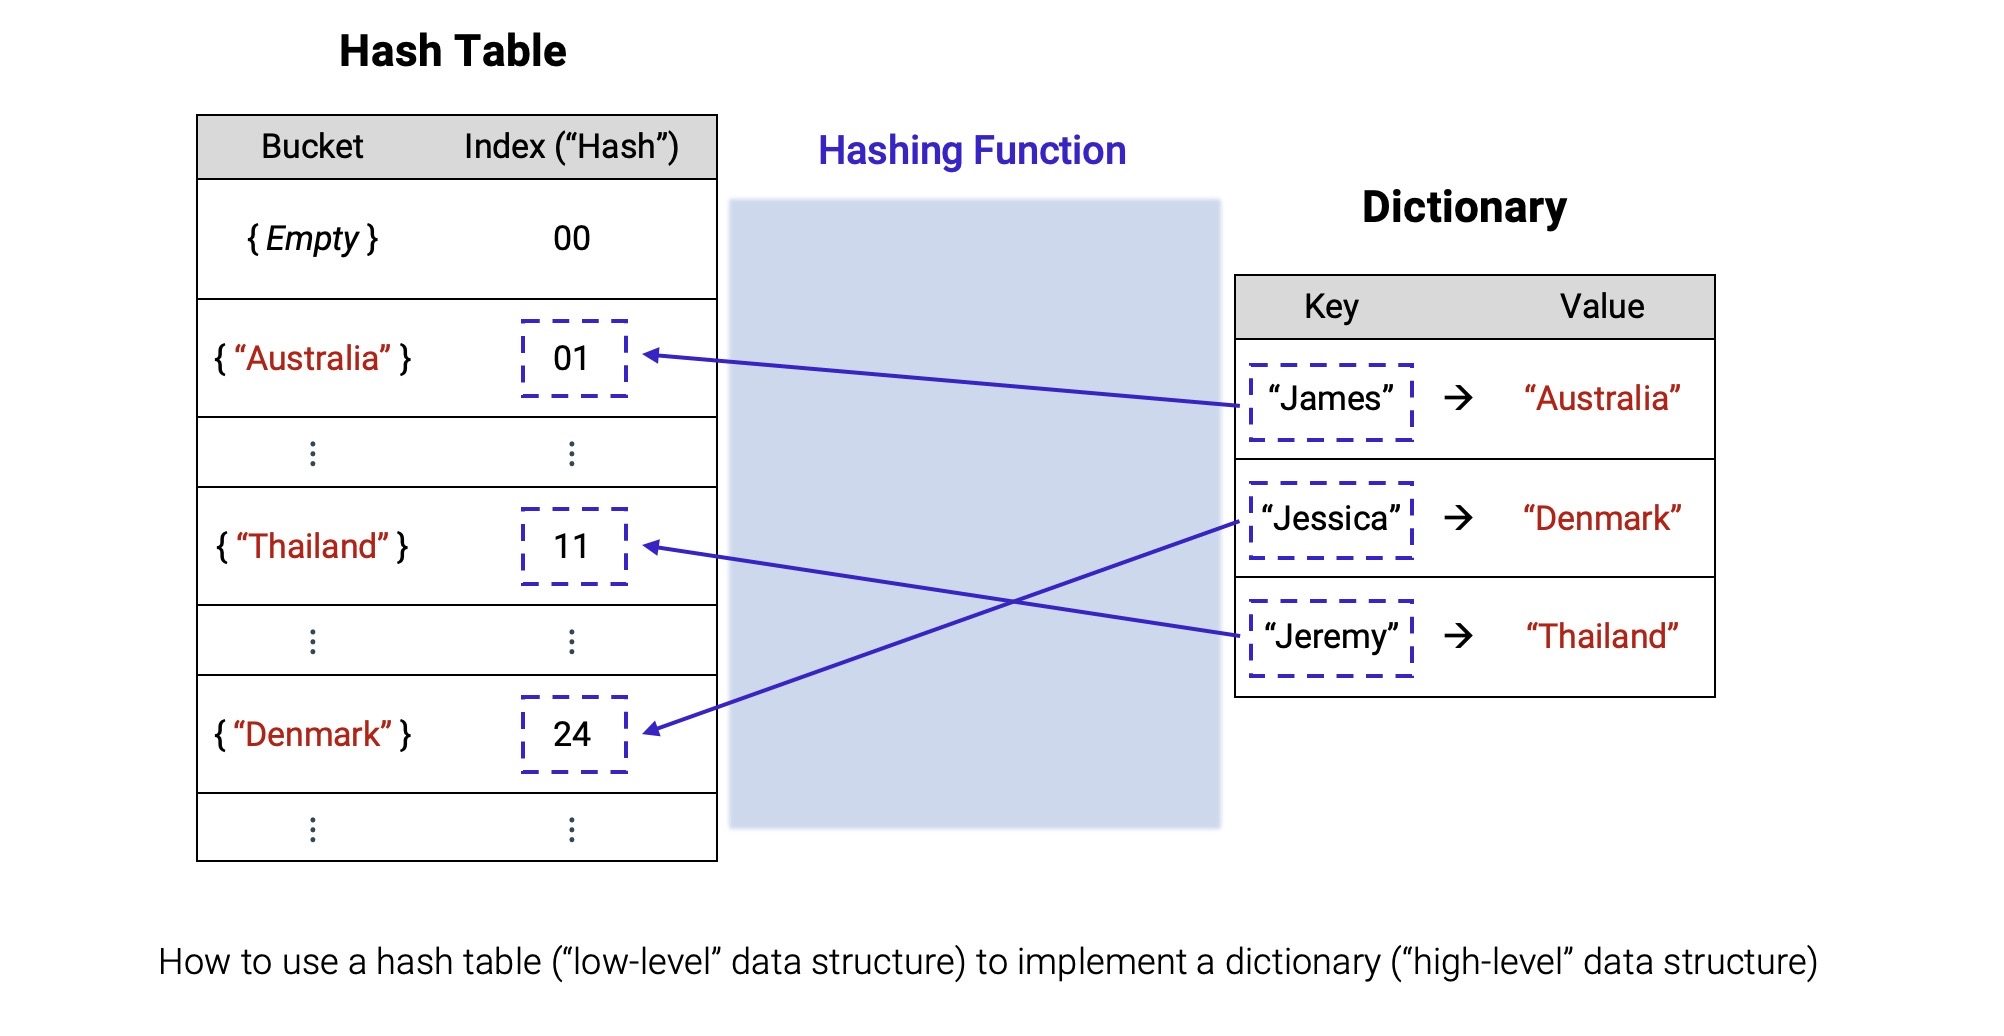

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Give some examples of when a dictionary may be useful. Explain.
    </span>
</div>

<u><b>Example 1</b></u>

*To illustrate how dictionaries are useful by enabling <u>convenient</u> lookups and modifications.*

---
Dictionaries can be very useful for storing data of entities with one or more *attributes* (and, sometimes, *meta-attributes*). Such data capitalize on the *associative* structure of dictionaries <u>and</u> the *mutability* of dictionary values, which in turn enable **convenient\* lookups and modifications**, respectively.

> \* Note that convenience is *not* the same concept as speed ([why?](#why)), even though it is true that dictionaries facilitate fast lookups and modifications too (see [Example 2](#betterExample) below).

---

(Data of entities with <u>a single attribute</u>) Suppose San Francisco Airport has provided us with real-time data of flight passengers and their flight numbers today. Let's say the data are stored as a list of tuples:

```
flight_data = [
    (<passenger_1>, <passenger_1_flight_number>),
    (<passenger_2>, <passenger_2_flight_number>),
              .
              .
              .
    (<passenger_N>, <passenger_N_flight_number>)
]
```
This would <u>not</u> be ideal. If there were passengers who changed flights, the immutability of tuples would mean that the data cannot be modified to reflect said changes! Now, let's say the data are stored as a dictionary instead:

```
flight_data = {
    <passenger_1>: <passenger_1_flight_number>,
    <passenger_2>: <passenger_2_flight_number>,
                 .
                 .
                 .
    <passenger_N>: <passenger_N_flight_number>
}
```

Then, the changes can be made now since dictionary values can be modified. Great!

---

(Data of entities with <u>multiple attributes</u>) Suppose we have a fictional social media company called GenZzz. Just like any other actual social media company (e.g., Instagram, TikTok), GenZzz would need to store data of its users where each user has a username, followers, etc. (the attributes). A (nested) dictionary would seem like the perfect choice: 

```
GenZzz_user_data = {
    <user1_id>: {"username": <user1_username>, "followers": [<user3_id>, <user15_id>, ...], ...},
    <user2_id>: {"username": <user2_username>, "followers": [<user8_id>, <user256_id>, ...], ...},
              .
              .
              .
    <userN_id>: {"username": <userN_username>, "followers": [<user1_id>], ...}
}
```
---

<a id='why'></a>
*To illustrate the subtle difference between convenience and speed.*

---

Let's create a nested list to store the same data of GenZzz users:

```
GenZzz_user_data_list = [
    [<user1_username>, [<user3_id>, <user15_id>, ...], ...],
    [<user2_username>, [<user8_id>, <user256_id>, ...], ...],
                .
                .
                .
    [<userN_username>, [<user1_id>], ...]
]
```

Let's say we want to look up user `100`'s followers. 


With the dictionary, we could do so easily via `GenZzz_user_data[<user100_id>]["followers"]`. How *convenient*.


With the list, however, we would do so via `GenZzz_user_data_list[99][1]`. Notice that this requires prior knowledge that the (sub)list of followers can be accessed at index `1` of user `100`'s list of attributes (`GenZzz_user_data_list[99]`). In fact, if user `100` had many attributes, we would probably need to create a helper dictionary that maps each attribute to its corresponding index in `GenZzz_user_data_list[99]`. The helper dictionary would look something like: 

```
helper_dictionary = {"username": 0, "followers": 1, ...}
```

Clearly, this is an unnecessary inconvenience!


Nonetheless, with such a helper dictionary, we can access user `100`'s followers via the nested list (`GenZzz_user_data_list`) *just as quickly* as via the dictionary (`GenZzz_user_data`). 


So: convenience =/= speed!

---

<a id='betterExample'></a>
<u><b>Example 2</b></u>

*To illustrate how dictionaries are useful by enabling <u>quick</u> lookups and modifications.*

---
In companies where employees often work with consumer data, dictionaries are typically used to store the data in an *organized* way that facilitates **quick lookups and modifications**. Let's tweak the SFO flight data example slightly. Suppose SFO staff want to find the full name of a particular flight passenger today. They can do so *efficiently* if the passenger data are stored in a dictionary like this: 

```
passenger_data = {
    <flightNumber_1>: [<passenger_name>, <passenger_name>, ...],
    <flightNumber_2>: [<passenger_name>, <passenger_name>, ...],
                    .
                    .
                    .
    <flightNumber_m>: [<passenger_name>, <passenger_name>, ...]
}
```

This would be less time-consuming than searching tirelessly through a list containing the names of <u>all</u> passengers who flew from/to SFO today; imagine sifting through tens of thousands of passengers' names! By making use of the known *association* between a passenger and the passenger's flight number, the SFO staff can narrow down their search space significantly.

> The assumption here is that the distribution of passenger names across the flight numbers is not heavily imbalanced. In the unlikely scenario where most or all of the passengers today happened to be on the same flight, then, searching through the dictionary would take practically the same amount of time as searching through a list of passenger names.

---

In case that didn't make sense, let's use an analogy closer to home:


Imagine that you are trying to find your favorite shirt to wear to a party. Let's assume that you have always stored all of your clothes together in one giant pile $-$ i.e., socks, shirts, pants, skirts, etc., all in that giant pile. Understandably, you might take a long time to find the shirt.


But what if you had organized your clothes by their type in the first place? You would then have a pile for socks, a pile for shirts, a pile for pants, and so on so forth. This would then allow you to go straight to the pile for shirts and find your favorite shirt, thereby significantly reducing your search time!

```
clothes_repository = {
    <pile_for_socks>: [<blue_socks>, <white_socks>],
    <pile_for_shirts>: [<dress_shirt>, <favorite_party_shirt>, <tech_bro_shirt>],
                     .
                     .
                     .
    <pile_for_pants>: [<cargo_pants>, <office_pants>]
}
```

---

<u><b>Good to know</b></u>

---
In Computer Science terms, the *average time complexity* of a search or insert operation on a Python dictionary is $\mathcal{O}(1)$ as compared to $\mathcal{O}(n)$ for a search or insert operation on a Python list. This is why Python dictionaries are incredibly useful in terms of providing speed; they are essentially\* the reason that search engines like Google can return your search results so quickly!

> \* The word "essentially" is used here because the *actual* underlying data structure that powers search engines is a hash table (built usually via a programming language that is lower-level than Python). But, as we have seen earlier, Python dictionaries are *fundamentally just* hash tables!

---

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Explain, in words, what the difference is between a <code>key</code> and a <code>value</code> in a dictionary.
    </span>
</div>

1. **Keys are unique** within a dictionary while values may not be. 


2. The values of a dictionary can be of any type, but the **keys must be of an immutable data type** such as strings, numbers, or tuples.

> Why must keys be immutable?
>
> For the official answer, look [here](https://docs.python.org/3/faq/design.html#why-must-dictionary-keys-be-immutable). 
>
> For an intuitive answer, think of key-value pairs as physical keys and vaults (or the treasure hidden in the vaults). Imagine Harry Potter and Hagrid trying to retrieve the Philosopher's stone from [the mysterious vault](https://harrypotter.fandom.com/wiki/Vault_713) in the winding dungeons of [Gringotts Wizarding Bank](https://harrypotter.fandom.com/wiki/Gringotts_Wizarding_Bank). If the key to the vault could be modified, Hagrid might not be able to unlock the vault and bring the stone back to Hogwarts for protection!

In [81]:
## See how when we try to create a dictionary where the keys are lists, an error is thrown!

x = {['hi']: 1, ['ri']: 2}

TypeError: unhashable type: 'list'

<h5> <u> Questions on NumPy </u> </h5>

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Create an <code>np</code> array <code>myNpArray_2022</code> of length 6 with the integers 1, 5, 12, 5, 3, 7.
    </span>
</div>

In [33]:
## Import NumPy library.
import numpy as np

In [35]:
## Create the array.
myNpArray_2022 = np.array([1, 5, 12, 5, 3, 7])

In [36]:
## Check that the array was created correctly.
myNpArray_2022

array([ 1,  5, 12,  5,  3,  7])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Create a Python list called <code>myList_2022</code> of length 6 with the integers 1, 5, 12, 5, 3, 7.
    </span>
</div>

In [41]:
## Create the list.
myList_2022 = [1, 5, 12, 5, 3, 7]

In [83]:
## Check that the list was created as desired.
myList_2022

[1, 5, 12, 5, 3, 7]

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Add <code>myNpArray_2022</code> to itself and report the answer.
    </span>
</div>

In [84]:
answer = myNpArray_2022 + myNpArray_2022

In [85]:
answer

array([ 2, 10, 24, 10,  6, 14])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Add <code>myList_2022</code> to itself and report the answer.
    </span>
</div>

In [86]:
answer = myList_2022 + myList_2022

In [87]:
answer

[1, 5, 12, 5, 3, 7, 1, 5, 12, 5, 3, 7]

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Add <code>myList_2022</code> to <code>myNpArray_2022</code> and report the answer.
    </span>
</div>

In [88]:
answer = myList_2022 + myNpArray_2022

In [89]:
answer

array([ 2, 10, 24, 10,  6, 14])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        What is a quick and easy <code>np</code> way to create a vector of 1's of length 1,000,000?
    </span>
</div>

In [47]:
np.ones(10**6, dtype=int) # dtype=int argument is optional

array([1, 1, 1, ..., 1, 1, 1])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        What default behavior happens in <code>np</code> when you add, subtract, multiply, or divide a vector (<code>np.array</code>) by a scalar? Provide an example.
    </span>
</div>

It adds/subtracts/multiplies/divides *every element* in the vector by the scalar.

In [49]:
## Create an arbitrary array of your choice.
x = np.array([2, 2, 2, 2, 2])
x

array([2, 2, 2, 2, 2])

In [50]:
## Example for addition.
x + 3

array([5, 5, 5, 5, 5])

In [51]:
## Example for subtraction.
x - 1

array([1, 1, 1, 1, 1])

In [52]:
## Example for multiplication.
x*5

array([10, 10, 10, 10, 10])

In [53]:
## Example for division.
x/2

array([1., 1., 1., 1., 1.])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Create an <code>np</code> array <code>npArray17to457</code> of integers from 17 to 457 inclusive.
    </span>
</div>

In [54]:
npArray17to457 = np.arange(start=17, stop=458) # Note that the upper bound 'stop' is exclusive!

In [55]:
npArray17to457

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 19

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Slice <code>npArray17to457</code> to obtain the first five numbers of the array.
    </span>
</div>

In [56]:
npArray17to457[:5]

array([17, 18, 19, 20, 21])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Slice <code>npArray17to457</code> to obtain the last 23 numbers of the array.
    </span>
</div>

In [57]:
npArray17to457[-23:]

array([435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447,
       448, 449, 450, 451, 452, 453, 454, 455, 456, 457])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Obtain the values from <code>npArray17to457</code> that are larger than 100.
    </span>
</div>

In [59]:
npArray17to457[npArray17to457 > 100]

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 28

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Obtain the values from <code>npArray17to457</code> that are larger than or equal to 100 <b>AND</b> smaller than or equal to 200.
    </span>
</div>

In [100]:
npArray17to457[(npArray17to457 >= 100) & (npArray17to457 <= 200)]

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Obtain the values from <code>npArray17to457</code> that are smaller than or equal to 100 <b>OR</b> larger than or equal to 450.
    </span>
</div>

In [101]:
npArray17to457[(npArray17to457 <= 150) | (npArray17to457 >= 450)]

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 450, 451, 452, 453, 454, 455, 456, 457])

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Obtain the values from <code>npArray17to457</code> that are <b>even</b>.
    </span>
</div>

In [102]:
even_values = npArray17to457[npArray17to457%2 == 0]

In [103]:
even_values

array([ 18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,  42,
        44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,
        70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,
        96,  98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120,
       122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146,
       148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172,
       174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198,
       200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224,
       226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250,
       252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276,
       278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302,
       304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328,
       330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354,
       356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 37

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        How many even numbers are there in <code>npArray17to457</code>?
    </span>
</div>

In [67]:
## Manual method.
(457 - 17)//2

220

In [112]:
## Pythonic method.
len(even_values)

220

In [97]:
# NumPy method 1.
np.count_nonzero( npArray17to457%2 == 0 )

220

In [96]:
# NumPy method 2 (slightly slower).
np.sum( npArray17to457%2 == 0 )

220

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        Obtain the values from <code>npArray17to457</code> that are <b>odd</b>.
    </span>
</div>

In [104]:
odd_values = npArray17to457[npArray17to457%2 != 0]

In [105]:
odd_values

array([ 17,  19,  21,  23,  25,  27,  29,  31,  33,  35,  37,  39,  41,
        43,  45,  47,  49,  51,  53,  55,  57,  59,  61,  63,  65,  67,
        69,  71,  73,  75,  77,  79,  81,  83,  85,  87,  89,  91,  93,
        95,  97,  99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119,
       121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145,
       147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171,
       173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197,
       199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223,
       225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249,
       251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275,
       277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301,
       303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327,
       329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353,
       355, 357, 359, 361, 363, 365, 367, 369, 371, 373, 375, 37

<div class="alert alert-block alert-warning"> 
    <span style="color:black">
        What is the sum of all of the <b>odd</b> values from <code>npArray17to457</code>?
    </span>
</div>

In [106]:
result = odd_values.sum()

In [113]:
print("Sum of odd values: ", result)

Sum of odd values:  52377


<div class="alert alert-block alert-success">
    
<b><center> End of Sample <b>